In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("driver-data.csv")

In [3]:
df.head(5)

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [7]:
highest_dist=df.nlargest(5,"mean_dist_day")

In [8]:
highest_dist.head(5)

,id,mean_dist_day,mean_over_speed_perc
3603,3423313028,244.79,9
3613,3423312656,242.37,15
3655,3423311567,241.71,22
3228,3423311974,234.52,88
3611,3423312090,234.09,7


In [9]:
lowest_dist=df.nsmallest(5,"mean_dist_day")
lowest_dist

,id,mean_dist_day,mean_over_speed_perc
1099,3423311850,15.52,3
291,3423313120,16.05,36
2873,3423313650,16.39,8
50,3423313738,17.66,23
86,3423312270,17.81,26


In [14]:
# Dropping the id value as it is not required

In [15]:
df=df.drop("id",axis=1)

<AxesSubplot:xlabel='mean_dist_day', ylabel='Density'>

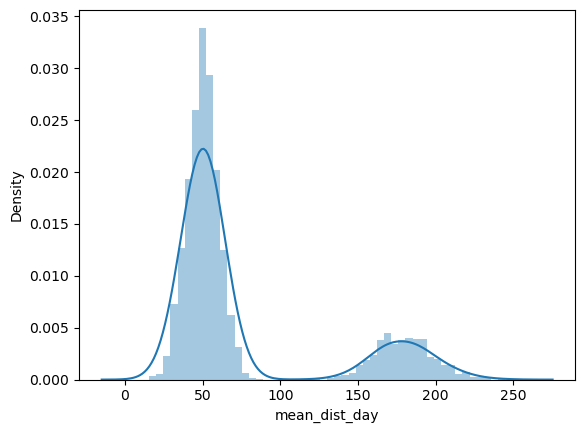

In [17]:
sns.distplot(df["mean_dist_day"])

C:\Users\rishabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_over_speed_perc', ylabel='Density'>

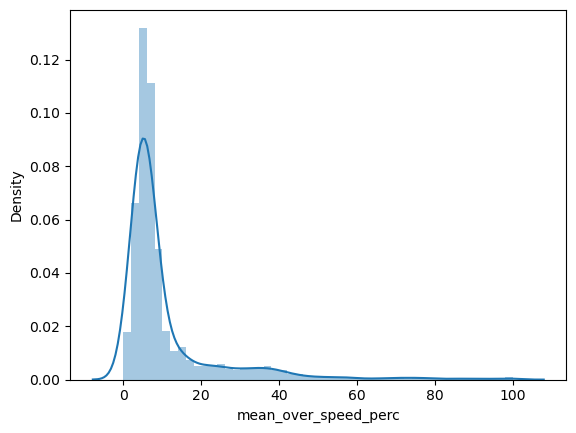

In [18]:
sns.distplot(df["mean_over_speed_perc"])

In [19]:
from sklearn.cluster import KMeans

In [20]:
clusters=[]

for i in range(1,7):
    kmm=KMeans(n_clusters=i).fit(df)
    clusters.append(kmm.inertia_)


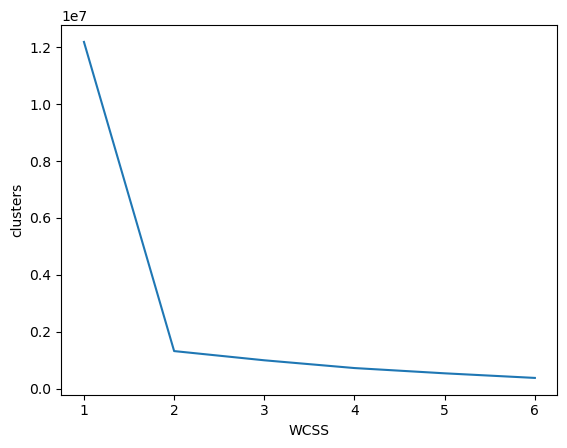

In [21]:
plt.plot(list(range(1,7)),clusters)
plt.xlabel("WCSS")
plt.ylabel("clusters")
plt.show()

In [26]:
# Taking the n_clusters =2 

In [27]:
knm_model=KMeans(n_clusters=2).fit(df)

In [28]:
print("The centroid values of the 2 clusters are:")
print(knm_model.cluster_centers_)

The centroid values of the 2 clusters are:
[[ 50.04763438   8.82875   ]
 [180.017075    18.29      ]]


In [29]:
df["Labels"]=knm_model.labels_

In [31]:
df.head(10)

,mean_dist_day,mean_over_speed_perc,Labels
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0
5,41.91,10,0
6,58.64,20,0
7,52.02,8,0
8,31.25,34,0
9,44.31,19,0


In [32]:
df["Labels"].value_counts()

0    3200
1     800
Name: Labels, dtype: int64

In [33]:
# Visualizing the cluster

C:\Users\rishabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rishabh\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

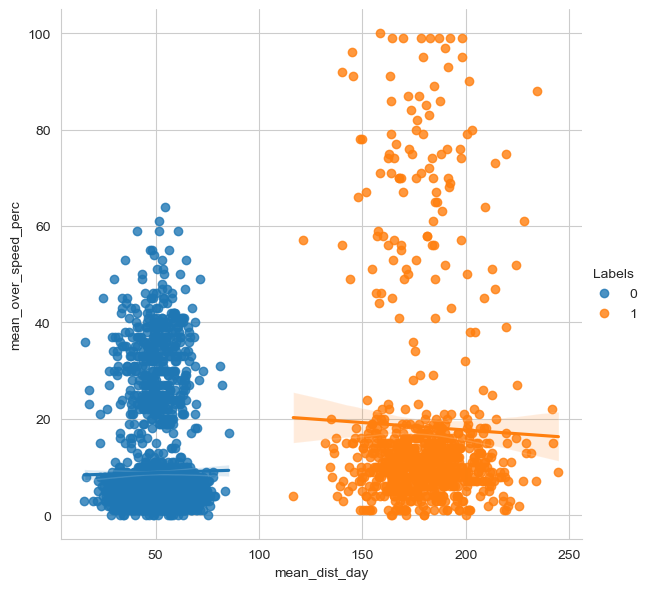

In [37]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.lmplot("mean_dist_day","mean_over_speed_perc",data=df,hue="Labels",fit_reg="False",size=6,aspect=1)
plt.show()